# Car Dealership Data Analysis and Visualization: Customer Insights and Trends

A car dealership wants to understand their customers and their buying habbits. The data (`cardealership.csv`) represents a randsome sample of their sales. 

|**VARIABLE**|**DESCRIPTION**|
|------------|---------------|
| **Gender** | gender for customer |
| **marital status** | is the customer 'Married' or 'Single'? |
| **age** | age of the customer |
| **country** | country make of the car |
| **size** |  the size of the car they bought ('Small', 'Medium', 'Large') |
| **type** | the type of the car they bought ('Family', 'Sporty', 'work') |

In [49]:
# gives 5 random lines in it 
carDealer.sample(5) 

,Gender,marital status,age,country,size,type
293,Female,Married,35,Japanese,Medium,Family
29,Male,Married,35,American,Small,Sporty
288,Female,Single,34,Japanese,Small,Family
225,Female,Married,35,Japanese,Small,Family
105,Male,Married,33,European,Small,Family


In [50]:
carDealer.shape[1]

6

1. (1 point) Select all the married customers in the given dataset, and save it in a variable (`married_customers`). What is the percentage of married customers in the sample?

In [3]:
import pandas as pd 

carDealer = pd.read_csv("cardealership.csv")

married_customers = carDealer["marital status"]
married_customers_count = married_customers.value_counts("Married")[0]
print(married_customers_count)

0.6468646864686468


2. (1 point) Use a list comprehension to create a list with two age categories. The category is `Below or equal to 30` if `age <= 30`, otherwise the category is `Above 30`. Use the result from this question to compute the number of customers in each category.

In [54]:
ages = ["Below or equal to 30" if age <30 else "Above 30" for age in carDealer["age"]]

pd.Series(ages).value_counts()

Above 30                159
Below or equal to 30    144
Name: count, dtype: int64

3. (2 points) The current version of `Pandas` has 142 methods including (`DataFrame()`, `Series()`, `value_counts()`, etc.). In this question, you are expected to learn about the `cut()` method which allows you to categorize a numerical vector into user-defined categories. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to learn more about the `cut` method.

    - Use the `cut()` method to categorize the `age` variable into three buckets: `(0,30]`, `(30, 34]`, and `(34,60]`. (For this exercise, you don't have to add the new column to the original dataframe. You can save it in a seperate variable instead)
    - Rename the labels of the buckets to the ones shown in the table below.  
    - How many element are there in each category? 



<center> 

|bucket | label |
|-------|-------|
|(0,30] | Below 30 | 
|(30, 34]| Between 30 and 34|
|(34,60]| Above 34|

<center>




In [10]:
buckets = pd.cut(carDealer["age"], bins=[0,30,34,60], labels=["Below 30", "Between 30 and 34", "Above 34"])
elements = buckets.value_counts()
print(elements)

age
Below 30             159
Above 34              76
Between 30 and 34     68
Name: count, dtype: int64


4. (1 point) `Pandas` has another method called `qcut`, which allows you to categorize a numerical variable into equal-sized buckets based on quantiles. Use the `qcut()` method to categorize `age` into quartiles (4 buckets). [Click here](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to learn more about the `cut` method

In [43]:
buckets = pd.qcut(carDealer["age"], q=4)
quartiles = buckets.value_counts()
print(quartiles)

age
(17.999, 26.0]    85
(34.5, 60.0]      76
(26.0, 30.0]      74
(30.0, 34.5]      68
Name: count, dtype: int64


5. (1 point) Using `pandas`, summarize the customer characteristics: `Gender`, `marital status` (using relative frequency tables) and `age` (using the `describe()` method). 

In [41]:
maritalStatus = carDealer["marital status"].value_counts(normalize=True)*100
print(maritalStatus)

marital status
Married    64.686469
Single     35.313531
Name: proportion, dtype: float64


In [40]:
gender = carDealer["Gender"].value_counts(normalize=True)*100
print(gender)

Gender
Male      54.455446
Female    45.544554
Name: proportion, dtype: float64


In [29]:
age = carDealer["age"].describe()
print(age)

count    303.000000
mean      30.719472
std        5.984294
min       18.000000
25%       26.000000
50%       30.000000
75%       34.500000
max       60.000000
Name: age, dtype: float64


6. (1 point) Using `pandas`, summarize the data on the cars sold: `country`, `size`, and `type` (using relative frequency tables).

In [30]:
country = carDealer["country"].value_counts(normalize=True)*100
print(country)

country
Japanese    48.844884
American    37.953795
European    13.201320
Name: proportion, dtype: float64


In [31]:
size = carDealer["size"].value_counts(normalize=True)*100
print(size)

size
Small     45.214521
Medium    40.924092
Large     13.861386
Name: proportion, dtype: float64


In [32]:
type = carDealer["type"].value_counts(normalize=True)*100
print(type)

type
Family    51.155116
Sporty    33.003300
Work      15.841584
Name: proportion, dtype: float64


7. (1 point) Write a summary paragraph describing the customers and cars sold data. Round all numbers in this paragraph to nearest integers.

In [ ]:
# Customers 
There are 303 total customers in this data. 
About 65% of those customers are married, and about 34% of them are single. 
Around 54% of customers are Male, and about 46% are female. 
The average age of a customer is around 31 years old, and the youngest car buyer is 18 years old.

# Cars Sold 
Japanese cars are sold the most, around 49%. American cars are second, with around 38%, and European cars are third with around 13%.
Most (45%) of customers buy small cars, 41% buy medium cars, and a small portion (14%) buy large cars. 
The majority of the cars, 51%, purchased are family cars. Sporty and work cars are less popular, with sporty cars sold 33% of the time and work cars sold 16% of the time. 

8. (2 points) Create a bargraph that shows the distribution of car `type`. Your bargraph should be similar to the attached bargraph picture on blackboard ('CarsTypeDistribution.png'). In particular, make sure to:

- Use default matplotlib plot style
- Use % for the labels of the y-axis ticks
- Use `lightgrey` for the bars color
- Overlay a horizontal line (y=25). The line's style is "dashed", and the color is "blue"

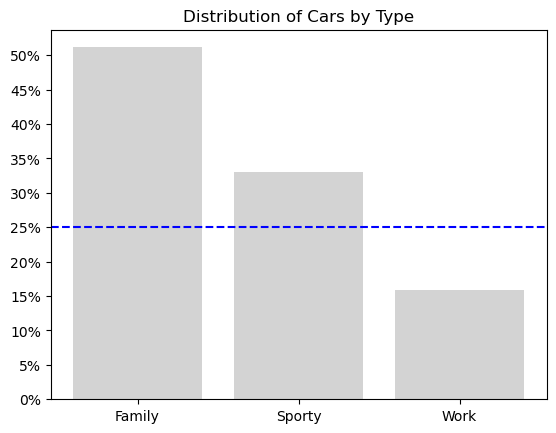

In [45]:
import matplotlib.pyplot as plt 

carType = carDealer["type"].value_counts(normalize=True)*100
plt.bar(carType.index, carType, color="lightgrey")
plt.title("Distribution of Cars by Type")

yLabel = ["0%", "5%", "10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%"]
plt.yticks(range(0,51,5), yLabel)
plt.axhline(y=25, color="blue", linestyle="dashed")

plt.show()
